### Theoretische Physik II Übungsblatt 7 - Rubin Mehralivand, Alina Probst

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Zuerst definieren wir die rechte Seite der AWA. Die Funktion nimmt einen Vektor $(z_1, z_2)$ als Input und berechnet jeweils $(\dot{z_1}, \dot{z_2})$. Da die rechte Seite nicht direkt abhängig von $t$ ist, wird $t$ nicht benutzt (der Vollständigkeit halber aber mit als Parameter aufgenommen).
\begin{equation}
\left\{ \begin{aligned}
  \dot{z}_1(t) &= z_2(t) \qquad& z_2(0) = 0\\
  \dot{z}_2(t) &= -z_1(t) \qquad& z_1(0) = 1
\end{aligned} \right.
\end{equation}

In [2]:
def f(t: float, z: np.ndarray) -> np.ndarray:
    r = np.ndarray(2)
    r[0] = z[1]
    r[1] = -z[0]
    return r

Wir definieren das Zeitintervall zur Auswertung (da die ODE linear ist existiert eine globale Lösung) $[-10,10]$ mit 2000 Zeitpunkten, also $h = 0.01$. Zusätzlich definieren wir drei Butcher-Tableaus die jeweils das explizite Eulerverfahren (RK1), RK2 und RK4 definieren.

In [3]:
T = np.linspace(-10, 10, 2000)  # Zeitintervall
initialwert = np.array([1, 0])  # Anfangswert

# Butcher-Tableau explizites Eulerverfahren
A_euler = np.array([
    [0]
])
b_euler = np.array([1])
c_euler = np.array([0])

# Butcher-Tableau RK2
A_2 = np.array([
    [0, 0],
    [1/2, 0]
])
b_2 = np.array([0, 1])
c_2 = np.array([0, 1/2])

# Butcher-Tableau RK4
A = np.array([
    [0, 0, 0, 0],
    [0.5, 0, 0, 0],
    [0, 0.5, 0, 0],
    [0, 0, 1, 1]
])
b = np.array([1/6, 1/3, 1/3, 1/6])
c = np.array([0, 0.5, 0.5, 1])

Meine selbstgeschriebene RK-Funktion nimmt die rechte Seite, die Anfangswerte, das Zeitintervall und das Butcher-Tableau als Input und berechnet automatisch das im Tableau vorgeschriebene RK-Verfahren.

In [4]:
def runge_kutta(f: callable, initialwert: np.ndarray, T: np.ndarray, A: np.array, b, c) -> np.ndarray:
    s = A.shape[0]  # Finde die Stufe des RK-Verfahrens
    n = T.shape[0]  # Berechne die Anzahl an Zeitschritten
    y = np.zeros((n, len(initialwert))) # Bereite den Lösungsvektor vor als Matrix
    y[0] = initialwert  # Füge die Anfangswerte in den Lösungsvektor ein

    for m in range(n-1):
        h = T[m+1]-T[m]
        k = np.zeros((s,len(initialwert)))

        for i in range (0, s):
            k[i] = f(T[m] + c[i] * h, y[m] + h * A[i, :] @ k[:])    # S. Rannacher-Skript oder das derzeitige Num1-Skript

        y[m+1] = y[m] + h * b[:] @ k[:]

    return y

### c)
Hier wird das Interface zur Berechnung eines Verfahrens und zum Vergleich von mehreren Verfahren definiert. Geplottet werden die Ergebnisse als Phasenraum, also $H(\phi,p) = H(q,p)$. <br><br>
Das explizite Eulerverfahren ist bei größeren Zeitschritten diffundierend, verliert (bzw. gewinnt) also an Energie. Dies liegt daran, dass man mit größeren Zeitschritten außerhalb des Stabilitätsgebiet des Verfahrens liegt, dementsprechend sieht der Phasenraum auch eher aus wie eine gedämpfte oder angetriebene harmonische Schwingung. <br><br>
Vergleicht man nun das expl. Eulerverfahren mit RK2 sieht man eine wesentliche Verbesserung der A-Stabilität und so gut wie keinen Energieverlust (bzw. -gewinn) durch Diffusion. Das RK2-Verfahren kann man aus dem Taylorverfahren herleiten, indem man Terme der 2. Ordnung mit einbezieht. somit ist die Lösung zwischen zwei Zeitpunkten keine Gerade mehr, sondern ein "quadratischer Spline" durch die Berechnung der Steigung $k_2$. Die Konsistenzordnung ist hier ebenfalls $O(h^2)$ im Vergleich zu $O(h)$ im expl. Eulerverfahren.

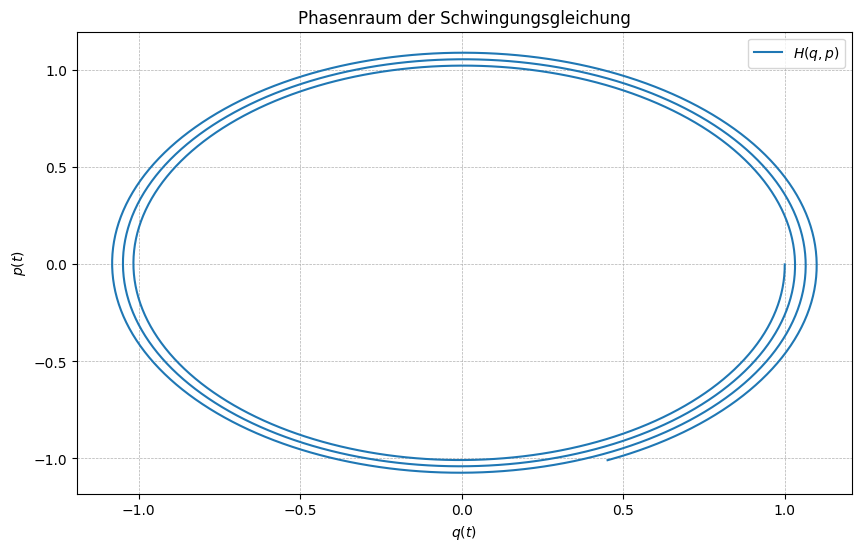

[ 0.45169393 -1.00870478]


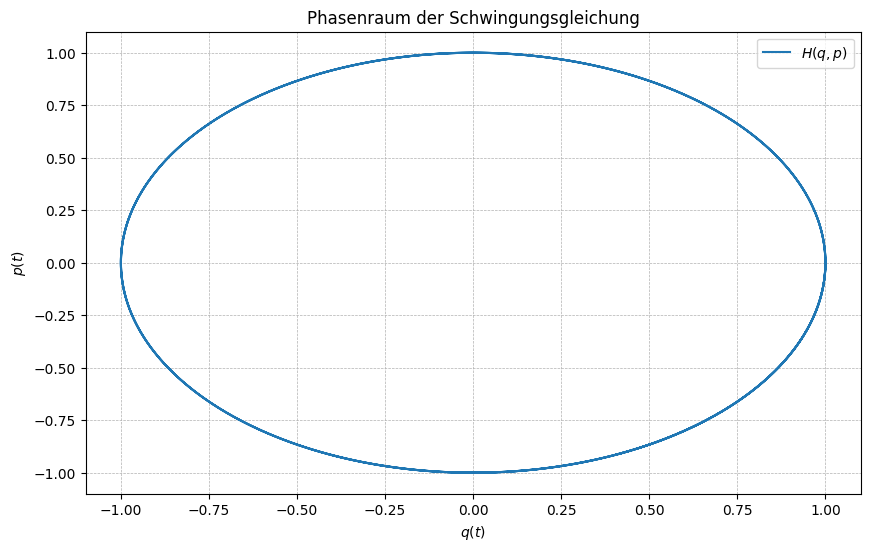

[ 0.40777845 -0.91308365]


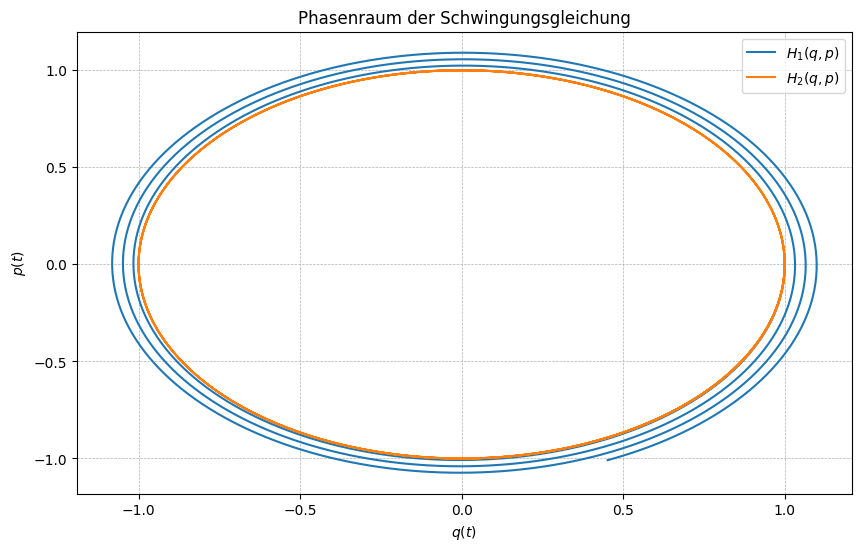

In [5]:
def equation_solver(initialwert, T: np.ndarray, A: np.ndarray, b: np.ndarray, c: np.ndarray) -> float:
    z = runge_kutta(f, initialwert, T, A, b, c)

    plt.figure(figsize=(10, 6))
    plt.plot(z[:,0], z[:,1], label='$H(q,p)$')
    plt.xlabel("$q(t)$")
    plt.ylabel("$p(t)$")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.title("Phasenraum der Schwingungsgleichung")
    plt.show()

    return z[-1]


def equation_comparator(initialwert, T: np.ndarray, A: tuple, b: tuple, c: tuple):
    comparisons = len(b)
    plt.figure(figsize=(10, 6))

    for i in range(0, comparisons):
        z = runge_kutta(f, initialwert, T, A[i], b[i], c[i])
        plt.plot(z[:,0], z[:,1], label=f'$H_{i+1}(q,p)$')
        plt.xlabel("$q(t)$")
        plt.ylabel("$p(t)$")
        plt.legend()
        plt.grid(True, which="both", linestyle="--", linewidth=0.5)
        plt.title(f"Phasenraum der Schwingungsgleichung")

    plt.show()


print(equation_solver(initialwert, T, A_euler, b_euler, c_euler))
print(equation_solver(initialwert, T, A_2, b_2, c_2))
equation_comparator(initialwert, T, (A_euler, A_2), (b_euler, b_2), (c_euler, c_2))

### d)
Nun Vergleichen wir RK1 und RK2 mit RK4 (statt RK45, da meine RK4 sowieso sehr nahe an RK45 liegt). Hier sehen wir, dass RK2 bereits sehr nahe an die Lösung von RK4 kommt und sich somit zur Berechnung von AWAs mit Erhaltungsgrößen wesentlich besser eignet, der Phasenraum ist beinahe eine vollständige Oszillation. Die Konsistenzordnung von RK4 ist $O(h^4)$.

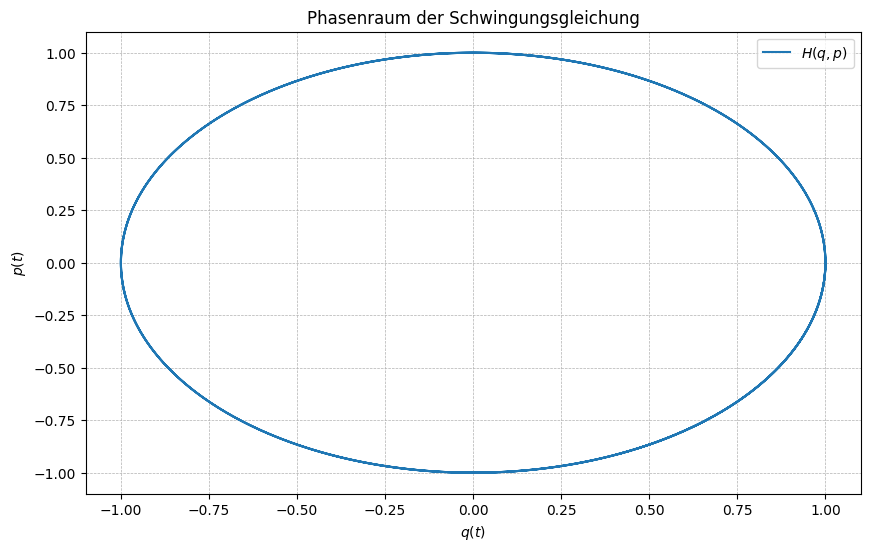

[ 0.40808206 -0.91294525]


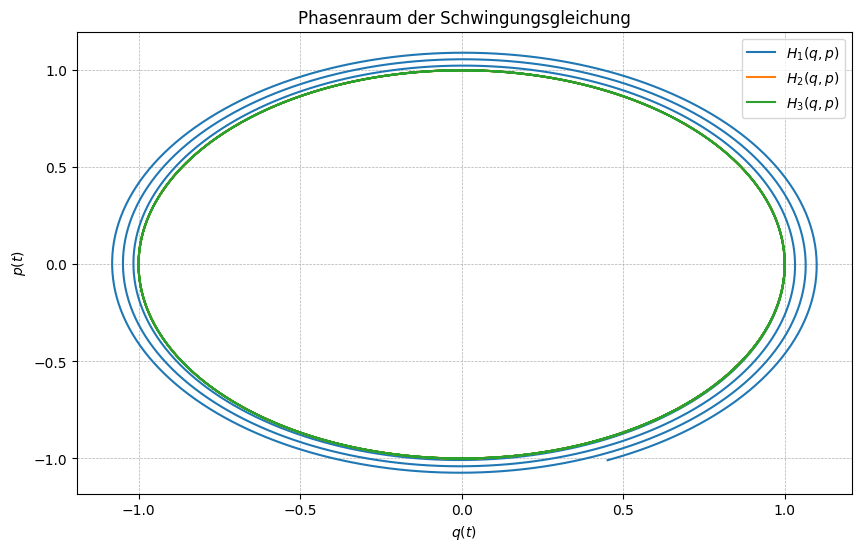

In [6]:
print(equation_solver(initialwert, T, A, b, c))
equation_comparator(initialwert, T, (A_euler, A_2, A), (b_euler, b_2, b), (c_euler, c_2, c))

### Bonus
Statt eines RK-Verfahrens höherer Ordnung kann man auch das explizite Eulerverfahren mit adaptiver Schrittweitenkontrolle implementieren. Hierbei werden vor jeder Berechnung die Schrittweiten angepasst, um den kleinsten Abschneidefehler zu generieren. Verkleinert man die erlaubten Toleranzen sieht man, dass das expl. Eulerverfahren nun ebenfalls einen guten Phasenraum erzeugt. Allerdings benötigt man ~7400 Fehlerberechnungen.

TOL: 0.01 	 Stepsize Reduction: 1.0230000000000001 	 Error Calculations: 41 	 Error at T: 0.3723243183336278

TOL: 0.001 	 Stepsize Reduction: 0.511 	 Error Calculations: 80 	 Error at T: 0.563200016810865

TOL: 0.0001 	 Stepsize Reduction: 0.127 	 Error Calculations: 168 	 Error at T: 0.9575323150677584

TOL: 1e-05 	 Stepsize Reduction: 0.10292268344348121 	 Error Calculations: 351 	 Error at T: 1.0565259248319265

TOL: 1e-06 	 Stepsize Reduction: 0.04742527070386193 	 Error Calculations: 750 	 Error at T: 2.1580411062406966

TOL: 1e-07 	 Stepsize Reduction: 0.02178299213203283 	 Error Calculations: 1611 	 Error at T: 4.480569969972719

TOL: 1e-08 	 Stepsize Reduction: 0.008428695561241262 	 Error Calculations: 3468 	 Error at T: 10.70814089140593

TOL: 1e-09 	 Stepsize Reduction: 0.0040841920610560365 	 Error Calculations: 7469 	 Error at T: 19.75669066897127



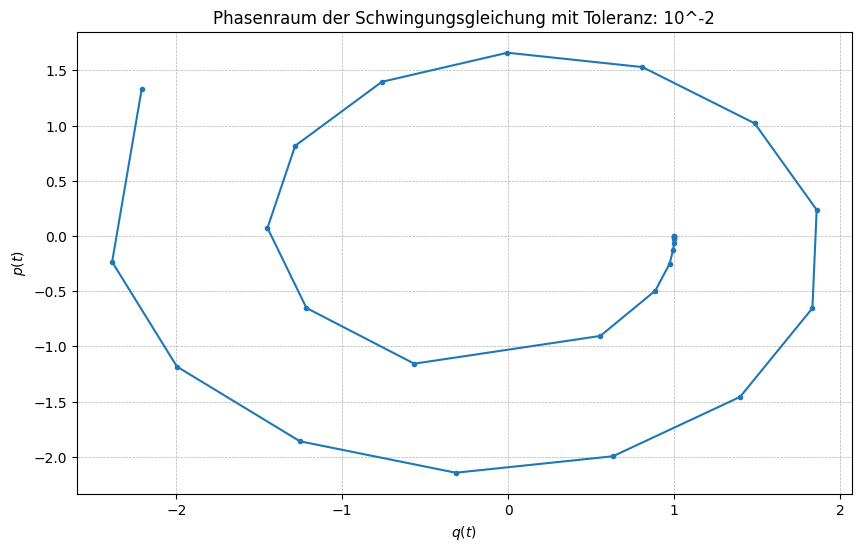

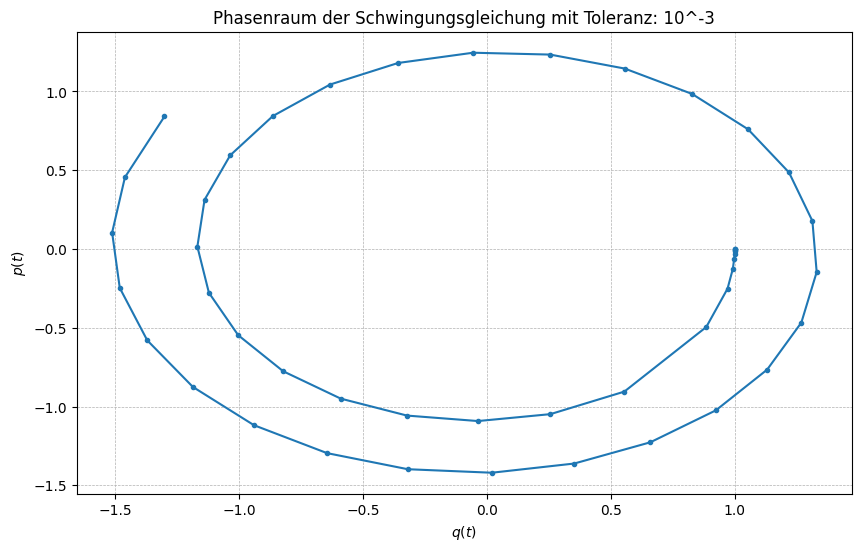

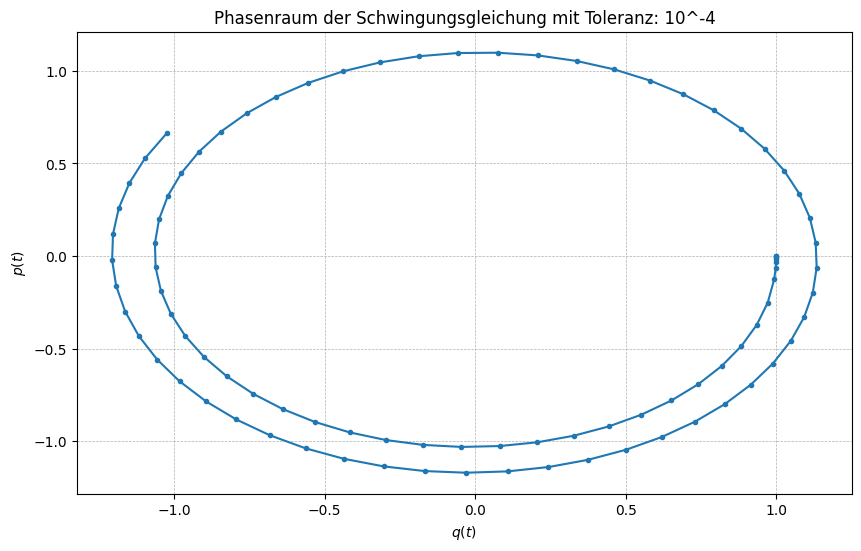

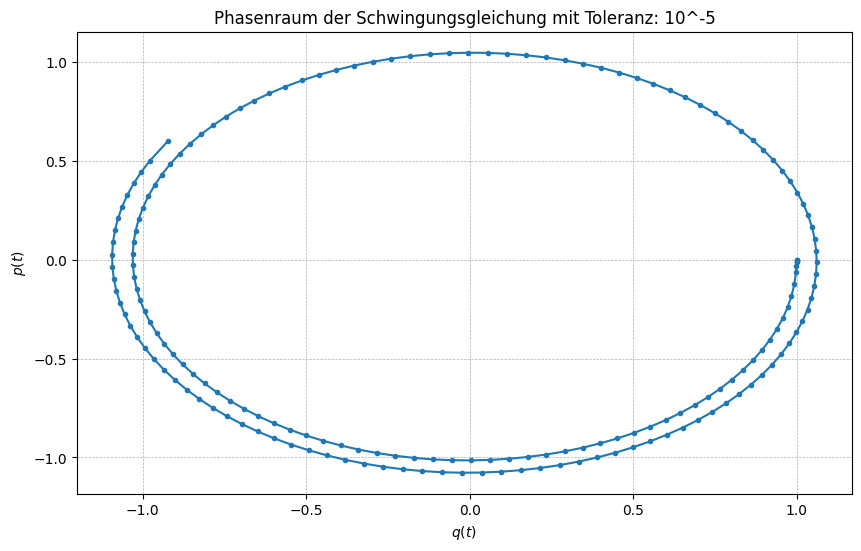

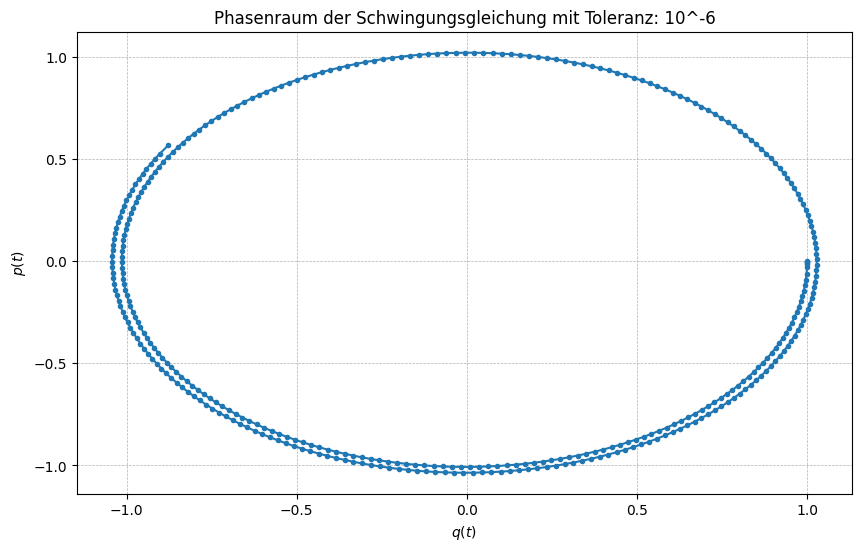

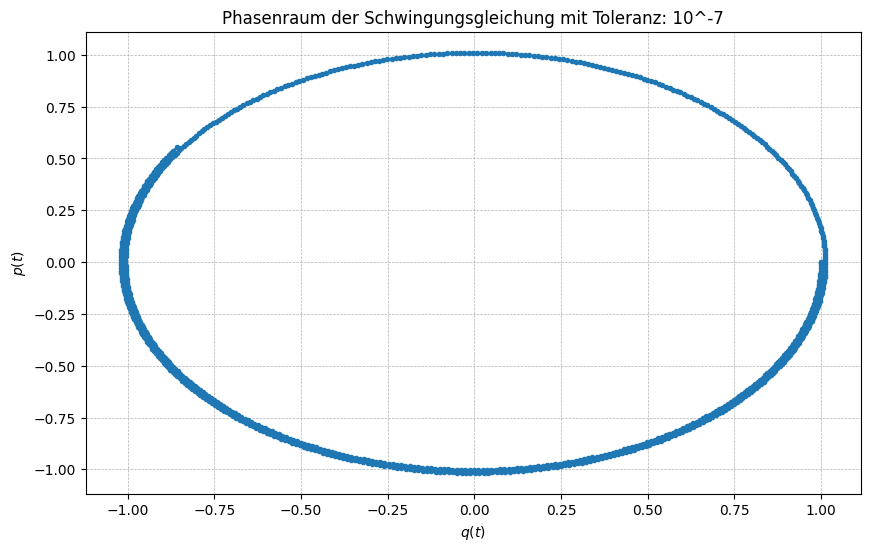

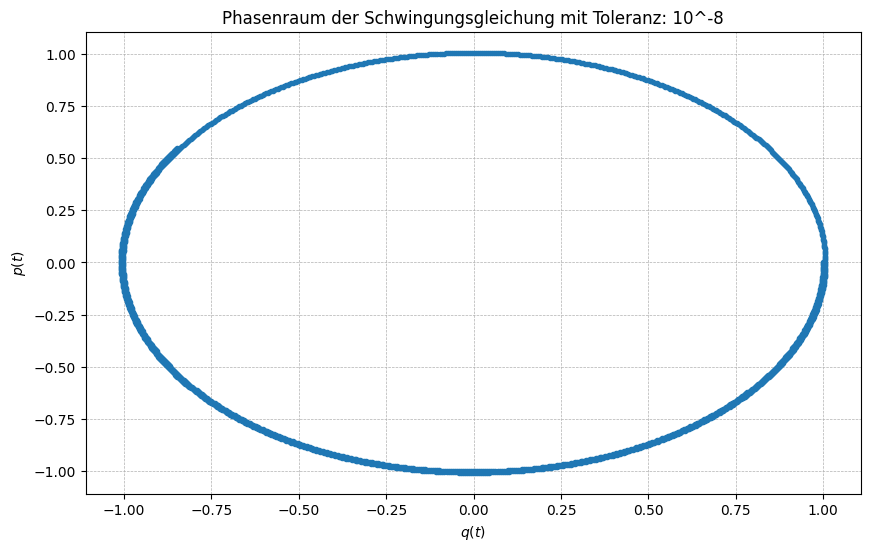

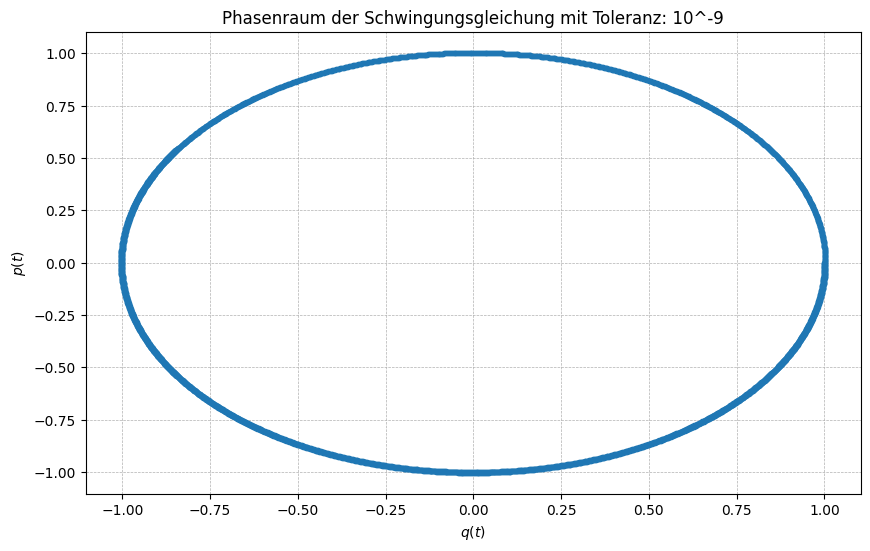

In [7]:
def runge_kutta(f: callable, t: float, y: np.ndarray, h: float, A: np.array, b: np.array, c: np.array) -> np.ndarray:
    # Umgeschriebenes RK-Verfahren für einen Schritt
    s = A.shape[0]

    k = np.zeros((s, len(initialwert)))

    for i in range(0, s):
        k[i] = f(t + c[i] * h, y + h * A[i, :] @ k[:])

    y = y + h * b[:] @ k[:]

    return y


def step_size_control(f: callable, h: float, t: float, t_end: float, y: np.array, tol: float) -> tuple:
    tau = 0
    n = 0

    while True:
        H = 2 * h
        # Berechne den a-posteriori Fehler bei Zeitschritthalbierung
        y_H = runge_kutta(f, t, y, H, A_euler, b_euler, c_euler)
        y_Half = runge_kutta(f, t, y, H / 2, A_euler, b_euler, c_euler)
        y_Half = runge_kutta(f, t + H / 2, y_Half, H / 2, A_euler, b_euler, c_euler)

        n += 1
        tau = np.linalg.norm(y_Half - y_H) / (H ** 3 * (1 - 2 ** -2))  # Berechnung Abschneidefehler
        h_new = (tol / (t_end * tau)) ** (1 / 4)  # Berechnung neue Schrittweite

        if h_new <= (0.25 * H):
            # Falls h_new zu grob ist, berechne erneut
            if H < np.finfo(float).eps:
                print('Fehler zu groß, Schrittweite anders wählen.')
                break
            h = h_new
            continue
        break

    return H, y_Half, y_H, np.linalg.norm(tau), n


def adaptive_rk(f: callable, y0: np.ndarray, t0: float, t_end: float, h0: float, tol: float):
    t = t0
    y = y0
    h = h0
    n = 0

    SR = np.array([h])  # Schrittweiten-Logging
    E = np.array([0])  # Fehler (angenommen ungestörte Anfangswerte)
    T = np.array([t])  # Zeitschritte t + h
    Y = np.array([y])  # Auswertungen

    while t < t_end:
        h = min(h, (t_end - t) / 2)  # Falls t + h > T setze h auf das Intervallende ( /2 wegen H = 2*h )
        H, y_Half, y_H, tau, steps = step_size_control(f, h, t, t_end, y, tol)
        n += steps  # Schrittzahl-Logging

        h = H
        t += H
        y = (2 ** 2 * y_Half - y_H) / (2 ** 2 - 1)  # Extrapolation zum Limes für bessere Näherung

        SR = np.append(SR, h)
        E = np.append(E, tau)
        T = np.append(T, t)
        Y = np.append(Y, [y], axis=0)

    return T, Y, 0.3 * E[-1], np.abs(max(SR) - min(SR)), n


for k in range(2, 10):
    t, z, error, stepsize_red, steps = adaptive_rk(
        f,
        initialwert,
        -5, # Intervallanfang
        5,  #Intervallende
        0.001, # Zeitschritte am Anfang
        10**-k  # Toleranz für den Abschneidefehler
    )

    print(f"TOL: {10**-k} \t Stepsize Reduction: {stepsize_red} \t Error Calculations: {steps} \t Error at T: {error}")
    print()
    plt.figure(figsize=(10, 6))
    plt.plot(z[:,0],
             z[:,1],
             marker='.',
             label='$H_1(q,p)$')
    plt.xlabel("$q(t)$")
    plt.ylabel("$p(t)$")
    #plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.title(f"Phasenraum der Schwingungsgleichung mit Toleranz: 10^-{k}")

plt.show()
